In [1]:
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint

Initialize

In [2]:
w = np.array([2,4,1,3,5,1,7,4])
val = np.array([30,10,20,50,70,15,40,25])
thrshd_knackpack = 25 
print('Item num \t Weight \t Values')
for i in range(len(w)):
    print('{0} \t \t {1}\t \t {2}\n'.format(i, w[i], val[i]))

Item num 	 Weight 	 Values
0 	 	 2	 	 30

1 	 	 4	 	 10

2 	 	 1	 	 20

3 	 	 3	 	 50

4 	 	 5	 	 70

5 	 	 1	 	 15

6 	 	 7	 	 40

7 	 	 4	 	 25



make random population

In [3]:
init_poulate = np.random.randint(2, size = (10,8))
init_poulate = init_poulate.astype(int)
num_gen = 50
print('init population: \n{}'.format(init_poulate))

init population: 
[[0 1 1 1 0 0 1 1]
 [1 1 1 0 1 0 1 0]
 [0 0 0 1 0 1 0 1]
 [1 0 0 0 0 1 0 1]
 [0 1 0 0 1 1 1 1]
 [0 1 0 1 1 0 1 1]
 [0 0 1 1 0 0 1 1]
 [1 1 0 0 1 1 1 1]
 [1 1 1 0 1 1 0 1]
 [0 1 0 0 0 1 0 1]]


In [4]:
def mohasebe_fitness(w, val, population, threshold):
    fitness = np.empty(population.shape[0])
    for i in range(population.shape[0]):
        val_sum = np.sum(population[i] * val)
        w_sum = np.sum(population[i] * w)
        if w_sum <= threshold:
            fitness[i] = val_sum
        else :
            fitness[i] = 0 
    return fitness.astype(int)   

Now we select the fittest individuals so that they can undergo crossover.

In [5]:
def selection(fitness, num_parents, population):
    fitness = list(fitness)
    parents = np.empty((num_parents, population.shape[1]))
    for i in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        parents[i,:] = population[max_fitness_idx[0][0], :]
        fitness[max_fitness_idx[0][0]] = -999999

    return parents

In [6]:
def mutation(parents):
    mutations = np.empty((parents.shape))
    rate_mute = 0.5
    for i in range(parents.shape[0]):
        random_value = rd.random()
        mutations[i,:] = parents[i,:]
        if random_value > rate_mute:
            continue

        randval1 = randint(0,parents.shape[1]-1)    
        mutations[i, randval1] = 0 if mutations[i, randval1] == 1 else 1

    return mutations

def crossover(parents, crossover_numbers):
    results = np.empty((crossover_numbers, parents.shape[1]))
    crossover_point = int(parents.shape[1]/2 + 1)
    crossover_rate = 0.8
    i=0
    while (parents.shape[0] < crossover_numbers):
        x = rd.random()
        if x > crossover_rate:
            continue

        parent1_index = i%parents.shape[0]
        parent2_index = (i+1)%parents.shape[0]
        results[i,0:crossover_point] = parents[parent1_index,0:crossover_point]
        results[i,crossover_point:] = parents[parent2_index,crossover_point:]
        i=+1

    return results    

In [7]:
def optimizer(w, val, population, pop_size, num_gen, threshold):
    parameters, fitness_history = [], []
    num_parents = int(pop_size[0]/2)
    num_offsprings = pop_size[0] - num_parents 
    for i in range(num_gen):
        fitness = mohasebe_fitness(w, val, population, threshold)
        fitness_history.append(fitness)
        parents = selection(fitness, num_parents, population)
        mutations = mutation(parents)
        population[0:parents.shape[0], :] = parents
        population[parents.shape[0]:, :] = mutations
        
    print('Last generation: ')
    print(population) 
    last_gen_fitness = mohasebe_fitness(w, val, population, threshold)      
    print('Fitness of the last generation: ')
    print(last_gen_fitness)
    max_fitness = np.where(last_gen_fitness == np.max(last_gen_fitness))
    parameters.append(population[max_fitness[0][0],:])
    return parameters, fitness_history

In [8]:
parameters, fitness_history = optimizer(w, val, init_poulate, (10,8), num_gen, thrshd_knackpack)
print('The optimizerd parameters for the given inputs are: ')
print(parameters)
selected_items = len(w) * parameters

Last generation: 
[[0 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [0 1 1 1 0 1 1 1]
 [0 1 1 0 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [0 1 0 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]]
Fitness of the last generation: 
[230 230 230 230 230 160 180 230 210 230]
The optimizerd parameters for the given inputs are: 
[array([0, 1, 1, 1, 1, 1, 1, 1])]


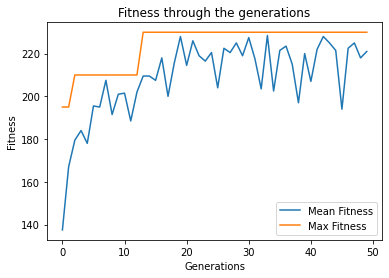

(50, 10)


In [9]:
fitness_history_mean = [np.mean(fitness) for fitness in fitness_history]
fitness_history_max = [np.max(fitness) for fitness in fitness_history]
plt.plot(list(range(num_gen)), fitness_history_mean, label = 'Mean Fitness')
plt.plot(list(range(num_gen)), fitness_history_max, label = 'Max Fitness')
plt.legend()
plt.title('Fitness through the generations')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()
print(np.asarray(fitness_history).shape)